# Exploration notebook

## Imports

In [17]:
!pip install textacy
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Google drive files for data
from google.colab import drive
drive.mount('/content/drive')

In [2]:
PATH_TRAIN = os.path.join("train.csv")

## Data exploration <a class="anchor" id="data-exploration"></a>

### General information

In [3]:
train_df = pd.read_csv(PATH_TRAIN)
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_df = pd.read_csv('./test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


### Distribution of location entries

In [ ]:
train_df["location"].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [ ]:
train_df["location"].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

<AxesSubplot:>

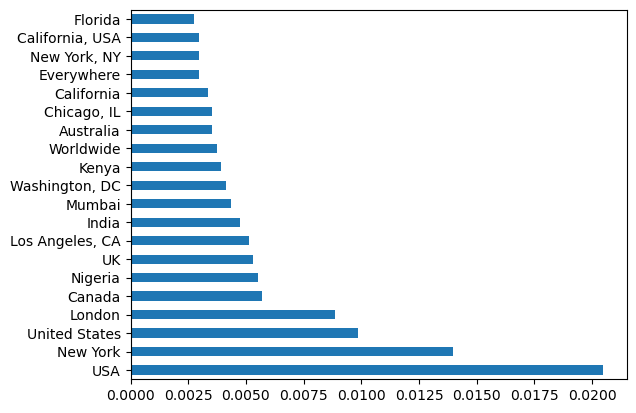

In [ ]:
# plot the distribution of the location for the 10 most common locations in percentage
train_df["location"].value_counts(normalize=True).head(20).plot(kind="barh")

We can see there's a lot of repetition in the location data. Some don't even make sense like "everywhere".

### Distribution of keywords

In [ ]:
train_df["keyword"].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [ ]:
train_df["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

<AxesSubplot:>

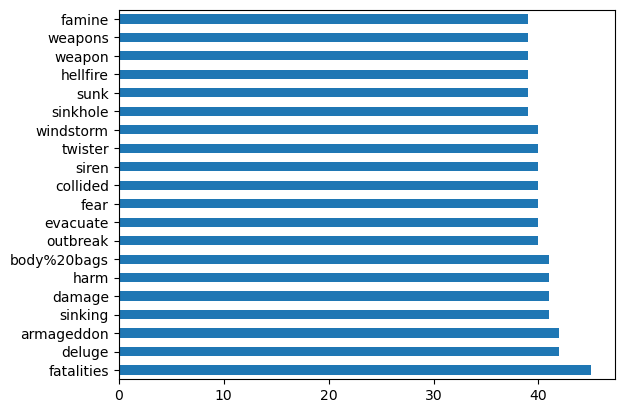

In [ ]:
# plot the distribution of the keyword for the 10 most common keywords in percentage
train_df["keyword"].value_counts().head(20).plot(kind="barh")

([], [])

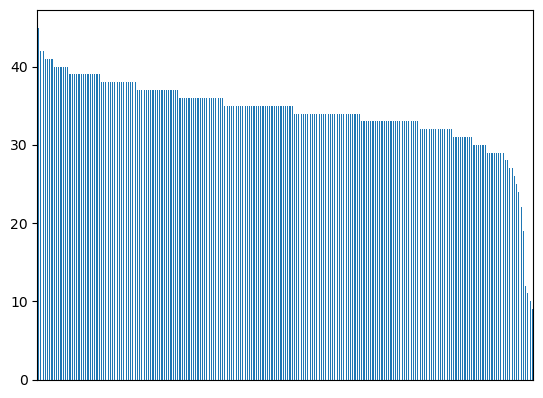

In [ ]:
# plot the distribution of the location for the 10 most common keywords in percentage without x ticks
train_df["keyword"].value_counts().plot(kind="bar")
plt.xticks([])

This feature is probably very important and is to be kept but at the same time there are a lot of different values

### Exploration of target

In [ ]:
train_df["target"].describe()

count    7613.00000
mean        0.42966
std         0.49506
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: target, dtype: float64

Text(0.5, 1.0, 'Distribution of labels for full train dataset')

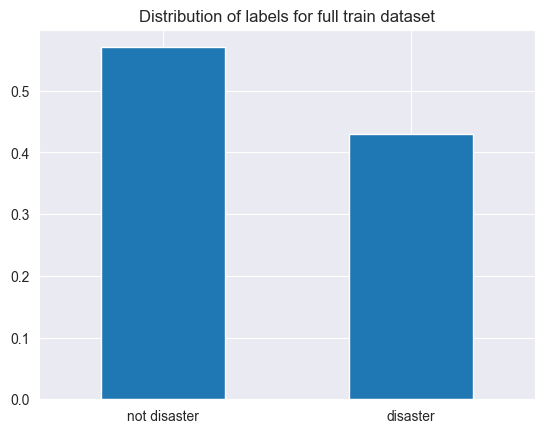

In [8]:
train_df["target"].value_counts(normalize=True).plot(kind="bar")
plt.xticks([0, 1], ['not disaster', 'disaster'], rotation=0)
plt.title("Distribution of labels for full train dataset")

### Exploration of tweets

In [ ]:
train_df['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [ ]:
for text in train_df['text'].head(20):
    print(text, len(text))

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all 69
Forest fire near La Ronge Sask. Canada 38
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 133
13,000 people receive #wildfires evacuation orders in California  65
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  88
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires 110
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas 95
I'm on top of the hill and I can see a fire in the woods... 59
There's an emergency evacuation happening now in the building across the street 79
I'm afraid that the tornado is coming to our area... 52
Three people died from the heat wave so far 43
Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #fl

Text(0.5, 0, 'Length of the text')

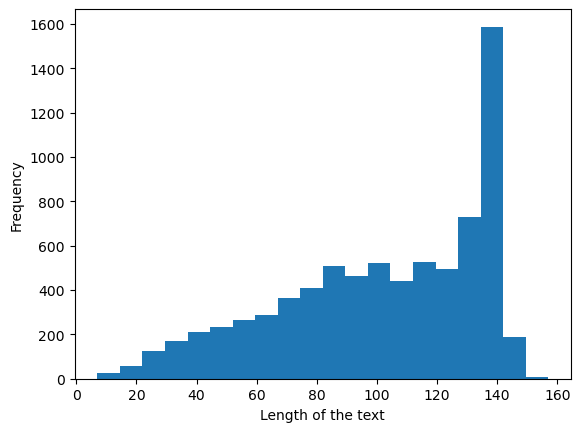

In [ ]:
# plot the distribution of the length of the text
train_df['text'].str.len().plot(kind="hist", bins=20)
plt.xlabel("Length of the text")


Text(0.5, 0, 'Length of the text')

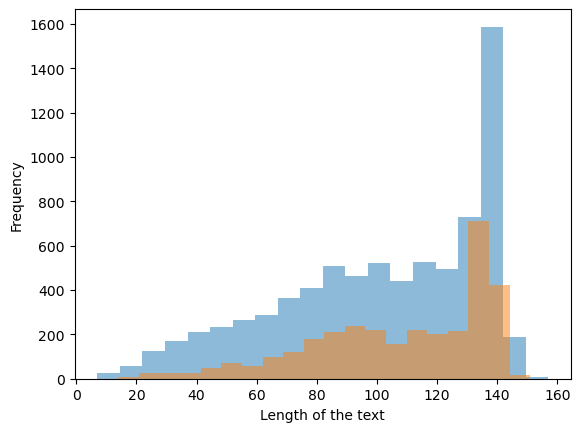

In [ ]:
# plot the distribution of the length of the text for the two classes
train_df['text'].str.len().plot(kind="hist", bins=20, alpha=0.5, label="All")
train_df[train_df['target'] == 1]['text'].str.len().plot(kind="hist", bins=20, alpha=0.5, label="Disaster")
plt.xlabel("Length of the text")

[Text(0, 0, 'Not Disaster'), Text(1, 0, 'Disaster')]

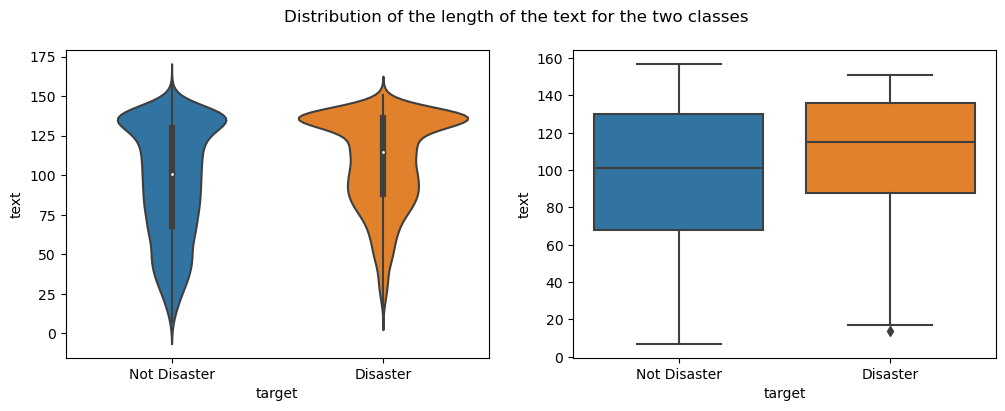

In [ ]:
# plot the distribution of the length of the text for the two classes with violin and boxplot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("Distribution of the length of the text for the two classes")
sns.violinplot(x=train_df['target'], y=train_df['text'].str.len(), ax=ax[0])
sns.boxplot(x=train_df['target'], y=train_df['text'].str.len(), ax=ax[1])
ax[0].set_xticklabels(['Not Disaster', 'Disaster'])
ax[1].set_xticklabels(['Not Disaster', 'Disaster'])

<a id="10"></a>
## Data Pre-processing 

### Non alpha-numeric values

We see the distribution is not the same, not disatrous tweets are more likely to be less than 70 (label 0)

In [ ]:
# Find all the non alphanumeric characters in the text
import re
def find_non_alphanumeric(text):
    return re.findall(r"[^a-zA-Z0-9 ]", text)

# Find all the non alphanumeric characters in the text
train_df['text'].apply(find_non_alphanumeric).head(20)

0                       [#]
1                       [.]
2                 [', ', .]
3                    [,, #]
4                    [#, #]
5     [#, =, >, ., -, #, #]
6                 [#, #, ,]
7              [', ., ., .]
8                       [']
9              [', ., ., .]
10                       []
11                   [-, #]
12    [#, #, #, #, #, ., ']
13                   [#, #]
14                      [#]
15                   [', ?]
16                       []
17                       []
18                       []
19       [!, !, !, !, !, !]
Name: text, dtype: object

In [ ]:
# Make a set out of all non alphanumeric characters in the text
non_alphanumeric_characters = set()
for text in train_df['text']:
    non_alphanumeric_characters.update(find_non_alphanumeric(text))
non_alphanumeric_characters


{'\n',
 '\r',
 '!',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '\x89',
 '\x9d',
 '¡',
 '¢',
 '£',
 '¤',
 '¨',
 '©',
 'ª',
 '«',
 '¬',
 '´',
 '¼',
 'Â',
 'Ç',
 'È',
 'Ê',
 'Ì',
 'Ï',
 'Ñ',
 'Ò',
 'Ó',
 'Û',
 'â',
 'ã',
 'å',
 '÷',
 'ü'}

In [ ]:
print(f"Number of different non Alpha-numeric characters : {len(non_alphanumeric_characters)}")

Number of different non Alpha-numeric characters : 60


There are 60 different types of non alpha numeric characters

Text(0.5, 0, 'Number of occurence')

) missing from current font./nlp/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
/home/romain/miniconda3/envs/nlp/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
) missing from current font./nlp/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
/home/romain/miniconda3/envs/nlp/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


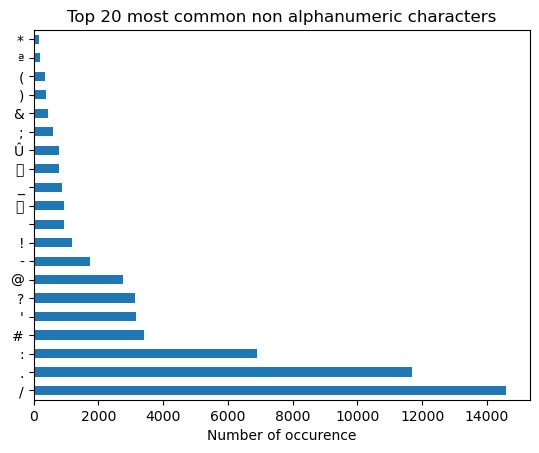

In [ ]:
# plot the number of occurence of the top 20 most common non alphanumeric characters
train_df['text'].apply(find_non_alphanumeric).explode().value_counts().head(20).plot(kind="barh")
plt.title("Top 20 most common non alphanumeric characters")
plt.xlabel("Number of occurence")

Most of the characters are not too concerning. Only "/", "#" and "@" would benefit from further investigation.

In [ ]:
# plot 20 tweets with the character "@" in the text
train_df[train_df['text'].str.contains("@")]['text'].head(20)

31     @bbcmtd Wholesale Markets ablaze http://t.co/l...
36     @PhDSquares #mufc they've built so much hype a...
43          SOOOO PUMPED FOR ABLAZE ???? @southridgelife
54     Noches El-Bestia '@Alexis_Sanchez: happy to se...
57     Set our hearts ablaze and every city was a gif...
63     @Navista7 Steve these fires out here are somet...
65     @nxwestmidlands huge fire at Wholesale markets...
66     @ablaze what time does your talk go until? I d...
75     RT @SleepJunkies: Sleeping pills double your r...
92     8/6/2015@2:09 PM: TRAFFIC ACCIDENT NO INJURY a...
97     #BREAKING: there was a deadly motorcycle car a...
98     @flowri were you marinading it or was it an ac...
100    .@NorwayMFA #Bahrain police had previously die...
102    @afterShock_DeLo scuf ps live and the game... cya
104    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yN...
106    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...
108    @afterShock_DeLo im speaking from someone that...
114    320 [IR] ICEMOON [AFTERS

The '@' character is mostly used in mentions, we should remove all mentions as they are not useful. The character is also used for dates which can be stripped too.

In [ ]:
# plot 20 tweets with the character "/ in the text
train_df[train_df['text'].str.contains("/")]['text'].head(20)

31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
32    We always try to bring the heavy. #metal #RT h...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
37    INEC Office in Abia Set Ablaze - http://t.co/3...
38    Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
40    Check these out: http://t.co/rOI2NSmEJJ http:/...
44    I wanted to set Chicago ablaze with my preachi...
45    I gained 3 followers in the last week. You? Kn...
46    How the West was burned: Thousands of wildfire...
48    Check these out: http://t.co/rOI2NSmEJJ http:/...
50    Deputies: Man shot before Brighton home set ab...
51    Man wife get six years jail for setting ablaze...
52    SANTA CRUZ ÛÓ Head of the St Elizabeth Police...
53    Police: Arsonist Deliberately Set Black Church...
54    Noches El-Bestia '@Alexis_Sanchez: happy to se...
55    #Kurds trampling on Turkmen flag later set it ...
56    TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSI

The "/" character is mainly used in urls, which can be stripped from the tweets as well.

Summary of the necessary data preprocessing step :

* Remove all mentions
* Remove all dates
* Remove all URLs

### Preprocessing using hand made functions

In [10]:
import html
import re

# define clean function
# add / remove any line if necessary
def clean(text):
    # convert html escapes like &amp; by their plain-text representation
    text = html.unescape(text) 
    
    # subsitute tags like <tab> by spaces in the specified text or remove them
    text = re.sub(r'<[^<>]*>', ' ', text)
    
    # subsitute markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    
    # subsitute text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    
    # subsitute standalone sequences of specials, matches &# but NOT #hashtag
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)

     # subsitute standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    
    #remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)  
    
    #remove old style retweet text "RT"
    text = re.sub(r'RT[\s]+', '', text)        
    text = re.sub(r'DT[\s]+', '', text)   
    
    #remove hashtags
    text = re.sub(r'#', '', text)
    
    return text.strip()

In [12]:
from textacy import preprocessing
from functools import partial

# create cleaning pipeline
preproc = preprocessing.make_pipeline(
    
    # join words split by a hyphen or line break
    preprocessing.normalize.hyphenated_words,
    
    # subsitute fancy quatation marks with an ASCII equivalent
    preprocessing.normalize.quotation_marks,
    
    # normalize unicode characters in text into canonical forms
    preprocessing.normalize.unicode,
    
    # remove any accents character in text by replacing them with ASCII equivalents or removing them entirely
    preprocessing.remove.accents,

    # remove all email addresses in text 
    partial(preprocessing.replace.emails, repl= ""), # or _EMAIL_
    
    # remove all phone numbers in text 
    partial(preprocessing.replace.phone_numbers, repl=""), # or _PhoneNumber_
    
    # remove all URLs in text 
    partial(preprocessing.replace.urls, repl= ""), # or _URL_
    
    # remove all (Twitter-style) user handles in text 
    partial(preprocessing.replace.user_handles, repl=""), # or _HANDLE_
    
    # Replace all hashtags in text with repl.
    #partial(preprocessing.replace.hashtags, repl="_HASTAG_"),
    
    ### TEST ### Enable it only before generating tokens for word clouds
    partial(preprocessing.replace.numbers, repl=""),
    
    # remove HTML tags from text
    preprocessing.remove.html_tags,

    # remove text within curly {}, square [], and/or round () brackets
    preprocessing.remove.brackets,

    # replace specific set of punctuation marks with whitespace
    partial(preprocessing.remove.punctuation, only=[ ",", ":", ";", "/", " ","(","@"]),
    
    # Replace all currency symbols in text with repl
    preprocessing.replace.currency_symbols,
    
    # replace all emoji and pictographs in text with repl.
    preprocessing.replace.emojis,
    
 )

In [16]:
train_df['text_c'] = train_df['text'].apply(clean)
train_df['text_clean'] = train_df['text_c'].apply(preproc)
train_df.head()

,id,keyword,location,text,target,text_c,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfires evacuation ord...",people receive wildfires evacuation orders in ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,Just got sent this photo from Ruby Alaska as s...


### Preprocessing using tweet-preprocessor

In [25]:
import preprocessor as p

p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.SMILEY, p.OPT.NUMBER, p.OPT.MENTION, p.OPT.ESCAPE_CHAR)
#forming a separate feature for cleaned tweets
for i,v in enumerate(train_df['text']):
    train_df.loc[i, 'text_prepro'] = p.clean(v)
    
train_df['text_prepro'] = train_df['text_prepro'].str.lower()

In [26]:
train_df.sample(100)

,id,keyword,location,text,target,text_c,text_clean,text_prepro
6945,9961,tsunami,in the Word of God,@helene_yancey GodsLove &amp; #thankU my siste...,1,@helene_yancey GodsLove thankU my sister Helen...,GodsLove thankU my sister Helene for of NEW VI...,godslove &amp; #thanku my sister helene for rt...
718,1038,bleeding,"Vero Beach , FL",@JaydenNotJared I can't help it. Hope you're o...,0,@JaydenNotJared I can't help it. Hope you're o...,I can't help it. Hope you're ok. Text me if yo...,i can't help it. hope you're ok. text me if yo...
4074,5792,hail,Calgary/Airdrie/RedDeer/AB,@tremblayeh we like big hail and we cannot lie...,0,@tremblayeh we like big hail and we cannot lie...,we like big hail and we cannot lie!! SirMixAlot,we like big hail and we cannot lie!! #sirmixalot
7110,10187,violent%20storm,Costa Rica,RT '@NASASolarSystem: Jupiter's Red Spot is a ...,0,'@NASASolarSystem: Jupiter's Red Spot is a vio...,' Jupiter's Red Spot is a violent storm larger...,rt ': jupiter's red spot is a violent storm la...
108,158,aftershock,Instagram - @heyimginog,@afterShock_DeLo im speaking from someone that...,0,@afterShock_DeLo im speaking from someone that...,im speaking from someone that is using a scuf ...,im speaking from someone that is using a scuf ...
...,...,...,...,...,...,...,...,...
2655,3814,detonate,"Morioh, Japan",@spinningbot Are you another Stand-user? If yo...,0,@spinningbot Are you another Stand-user? If yo...,Are you another Stand-user? If you are I will ...,are you another stand-user? if you are i will ...
4743,6746,lava,NaN,I wish that the earth sea and sky up above\r\n...,0,I wish that the earth sea and sky up above wou...,I wish that the earth sea and sky up above wou...,i wish that the earth sea and sky up abovewoul...
7470,10687,wreck,NaN,I am a wreck,0,I am a wreck,I am a wreck,i am a wreck
3983,5659,flooding,"Nadiad ,Gujarat , India!!",Thankkk U all Soo much for Flooding my Notific...,0,Thankkk U all Soo much for Flooding my Notific...,Thankkk U all Soo much for Flooding my Notific...,thankkk u all soo much for flooding my notific...


Seems pretty good but :

* Doesn't remove dates
* Removes text in between two urls
* Removes the whole hashtag, we would rather remove the "#" character

### Missing values

In [ ]:
# count the missing values in the train and test set
train_df.isna().sum(), test_df.isna().sum()


(id             0
 keyword       61
 location    2533
 text           0
 target         0
 dtype: int64,
 id             0
 keyword       26
 location    1105
 text           0
 dtype: int64)